In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../Data/RIU_Plankton.csv', delimiter=';', low_memory=False, on_bad_lines='skip')
df = df.iloc[1:]
df['Total abundance'] = df['Total abundance'].str.replace(',', '.')
df

,DATE,COUNT TYPE,LOCATION,Total abundance,Achnanthes spp.,Actinocyclus sp.,Actinomonas sp.,Actinoptychus senarius,Akashiwo sanguineum,Alexandrium sp.,...,Thalassiosira pacifica,Thalassiosira punctigera,Thalassiosira rotula,Thalassiosira rotula/gravida,Thalassiosira spp.,Thalassiosira spp. cf,Thalassiosira spp. chain forming,Trichodesmium sp.,Protoperadinium Denticuulatum,Unnamed: 255
1,25-Jan-99,S/R Cell mixed,N. Bay sta. 2,124000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
2,1-Feb-99,S/R Cell mixed,N. Bay sta. 2,113000,0,0,0,0,0,0,...,0,0,0,0,0,3000,2000,0,0,NaN
3,8-Feb-99,S/R Cell mixed,N. Bay sta. 2,107000,0,0,0,0,0,0,...,0,0,0,0,0,500,0,0,0,NaN
4,15-Feb-99,S/R Cell mixed,N. Bay sta. 2,95500,0,0,0,0,0,0,...,0,0,0,0,0,1500,0,0,0,NaN
5,22-Feb-99,S/R Cell mixed,N. Bay sta. 2,163500,0,0,0,0,0,0,...,0,0,0,0,0,5000,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2105,31-Dec-24,S/R Depth,N Bay sta. 2,10373000,0,0,0,0,0,0,...,0,0,21000,0,0,0,0,0,0,NaN
2106,6-Jan-25,S/R Surface,N Bay sta. 2,25157000,0,0,0,0,0,0,...,0,0,6000,0,0,0,0,0,0,NaN
2107,6-Jan-25,S/R Depth,N Bay sta. 2,22852000,0,0,0,0,0,0,...,0,0,1000,0,0,0,0,0,0,NaN
2108,13-Jan-25,S/R Surface,N Bay sta. 2,15892000,0,0,0,0,0,0,...,0,0,7000,0,0,0,0,0,0,NaN


In [3]:
df_cnts = df.isna().sum().sort_values() #NO NAN Values

In [4]:
df = df[['DATE','Total abundance']]
df

,DATE,Total abundance
1,25-Jan-99,124000
2,1-Feb-99,113000
3,8-Feb-99,107000
4,15-Feb-99,95500
5,22-Feb-99,163500
...,...,...
2105,31-Dec-24,10373000
2106,6-Jan-25,25157000
2107,6-Jan-25,22852000
2108,13-Jan-25,15892000


In [5]:
#Convert to date time 
df['DATE'] = pd.to_datetime(df['DATE'].astype(str),  format='mixed', dayfirst=True, errors='coerce')
df

/tmp/ipykernel_255/1701046825.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DATE'] = pd.to_datetime(df['DATE'].astype(str),  format='mixed', dayfirst=True, errors='coerce')


,DATE,Total abundance
1,1999-01-25,124000
2,1999-02-01,113000
3,1999-02-08,107000
4,1999-02-15,95500
5,1999-02-22,163500
...,...,...
2105,2024-12-31,10373000
2106,2025-01-06,25157000
2107,2025-01-06,22852000
2108,2025-01-13,15892000


<Axes: >

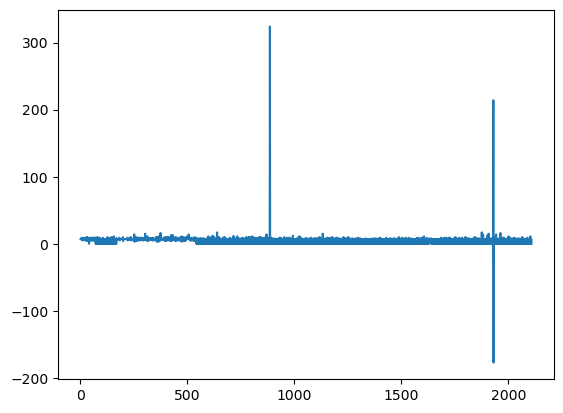

In [6]:
#Days between observations
diffs = df['DATE'].diff().reset_index().drop(columns = ['index']).apply(lambda val: val.DATE.days, axis = 1)
diffs.plot()
#diffs

In [7]:
df['YearMonth'] = df['DATE'].dt.to_period('M')
df.groupby('YearMonth').count()

/tmp/ipykernel_255/1998733674.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['YearMonth'] = df['DATE'].dt.to_period('M')


,DATE,Total abundance
YearMonth,,
1999-01,1,1
1999-02,4,4
1999-03,5,5
1999-04,4,4
1999-05,5,5
...,...,...
2024-09,10,10
2024-10,8,8
2024-11,8,8


In [8]:
df = df[df['Total abundance'] != 'NO SAMPLES PRESERVED']
df['Total abundance'] = df['Total abundance'].astype(float)
df = df.groupby('YearMonth').mean()

/tmp/ipykernel_255/493140043.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total abundance'] = df['Total abundance'].astype(float)


In [9]:
full_range = pd.period_range(start="1999-01", end="2025-01", freq="M")
missing_months = full_range.difference(df.index)
print(missing_months)

PeriodIndex(['2012-03', '2012-04', '2012-05', '2012-06', '2012-07', '2012-08',
             '2012-09', '2012-10', '2012-11', '2012-12'],
            dtype='period[M]')


In [11]:
full_range = pd.period_range(start="1999-01", end="2025-01", freq="M")
df = df.reindex(full_range)
df.reset_index(inplace=True)
df.rename(columns={'index': 'YearMonth'}, inplace=True)
df

,YearMonth,DATE,Total abundance
0,1999-01,1999-01-25 00:00:00,1.240000e+05
1,1999-02,1999-02-11 12:00:00,1.197500e+05
2,1999-03,1999-03-16 00:00:00,1.983000e+05
3,1999-04,1999-04-15 12:00:00,1.595075e+06
4,1999-05,1999-05-17 09:36:00,1.199800e+06
...,...,...,...
308,2024-09,2024-09-16 00:00:00,5.989750e+05
309,2024-10,2024-10-17 12:00:00,1.103750e+05
310,2024-11,2024-11-15 16:00:00,3.196667e+05
311,2024-12,2024-12-15 09:36:00,3.283100e+06


In [12]:
#should have no missing months 
full_range = pd.period_range(start="1999-01", end="2025-01", freq="M")
missing_months = full_range.difference(df['YearMonth'])
print(missing_months)

PeriodIndex([], dtype='period[M]')


<Axes: >

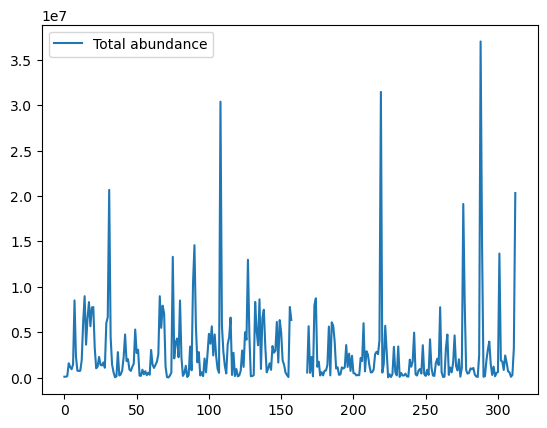

In [14]:
df[['YearMonth','Total abundance']].plot()

In [15]:
df = df[['YearMonth','Total abundance']]
df

,YearMonth,Total abundance
0,1999-01,1.240000e+05
1,1999-02,1.197500e+05
2,1999-03,1.983000e+05
3,1999-04,1.595075e+06
4,1999-05,1.199800e+06
...,...,...
308,2024-09,5.989750e+05
309,2024-10,1.103750e+05
310,2024-11,3.196667e+05
311,2024-12,3.283100e+06


In [16]:
df.to_csv('../Data/RIU_cleaned.csv')